In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('supermarket_sales.csv')

# Preview
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month for trend analysis
df['Month'] = df['Date'].dt.to_period('M')

# Check for null values
print(df.isnull().sum())

# Check data types
df.info()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object  

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Sales, dtype: float64


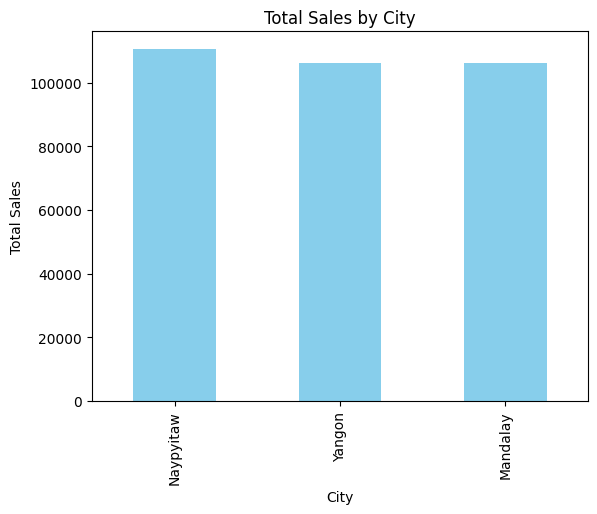

In [6]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
print(city_sales)

city_sales.plot(kind='bar', title='Total Sales by City', color='skyblue')
plt.ylabel('Total Sales')
plt.show()


Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


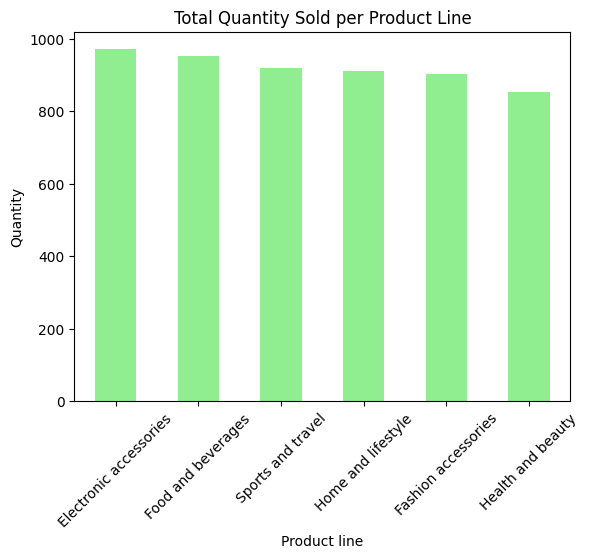

In [7]:
product_qty = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print(product_qty)

product_qty.plot(kind='bar', title='Total Quantity Sold per Product Line', color='lightgreen')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()


Month
2019-01    116291.868
2019-02     97219.374
2019-03    109455.507
Freq: M, Name: Sales, dtype: float64


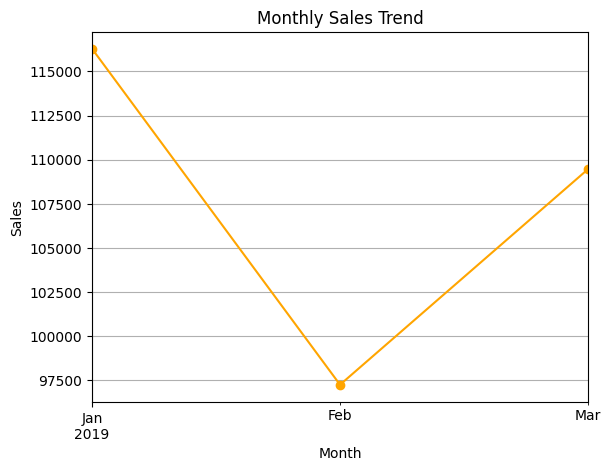

In [8]:
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

monthly_sales.plot(marker='o', title='Monthly Sales Trend', color='orange')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Customer type
Member    6.917168
Normal    7.044828
Name: Rating, dtype: float64


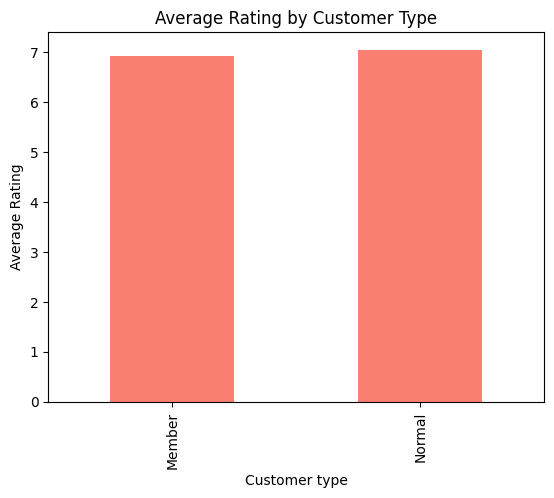

In [9]:
rating_avg = df.groupby('Customer type')['Rating'].mean()
print(rating_avg)

rating_avg.plot(kind='bar', title='Average Rating by Customer Type', color='salmon')
plt.ylabel('Average Rating')
plt.show()


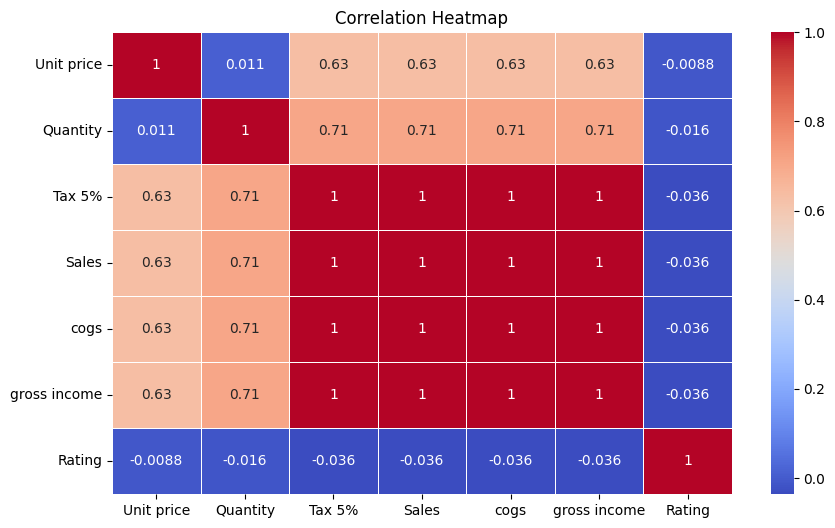

In [10]:
# Select only numeric columns for correlation
numeric_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs', 'gross income', 'Rating']
correlation = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Create summary dataframe
city_sales_summary = df.groupby('City')[['Sales', 'gross income']].sum().reset_index()

# Export to CSV
city_sales_summary.to_csv('city_sales_summary.csv', index=False)

# Export full dataset (cleaned)
df.to_csv('cleaned_supermarket_sales.csv', index=False)
